# Simple Linear Regression

Simple Linear Regression is a statistical method used to model the relationship between two continuous variables: 
- a dependent variable (also called the response variable) and 
- an independent variable (also called the predictor variable or feature). 

The goal of linear regression is to find the best-fitting straight line that represents the linear relationship between these two variables.

### EDA on Salary_Data Dataset

In [1]:
# Import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset

df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# Check the dimensions of dataset

df.shape

(30, 2)

In [4]:
# Check data types of each column

df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [5]:
# Check for missing values

df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

There are no null values in the dataset

In [6]:
# Check for duplicate values

df.duplicated().sum()

0

There are no duplicate values in the dataset

In [7]:
# Calculate summary statistics

df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


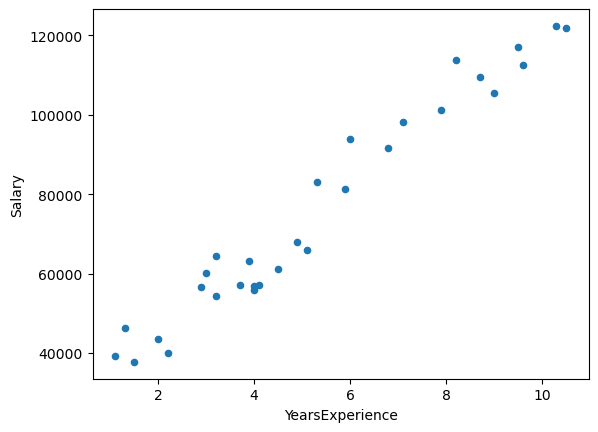

In [8]:
# Visualize relationship between two columns

df.plot.scatter(x='YearsExperience', y='Salary')
plt.show()

### Building the Linear Regression Model

In [9]:
X = df.iloc[:, :1].values
y = df.iloc[:, -1].values

In [10]:
# Importing the necessary libraries to build a model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# Model Fitting

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Model Prediction

y_pred = model.predict(X_test)
print(y_pred)

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


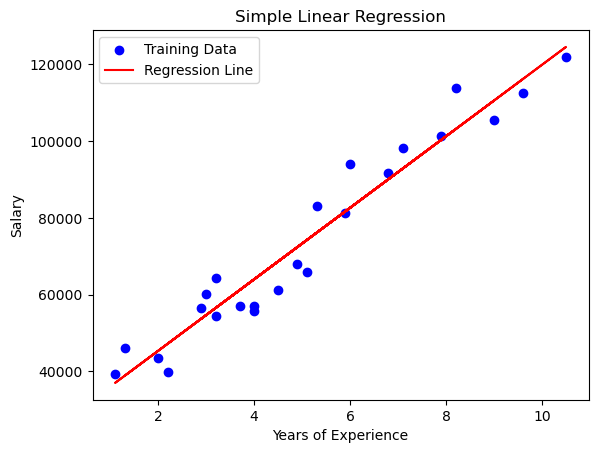

In [14]:
# Visualization of training data

plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

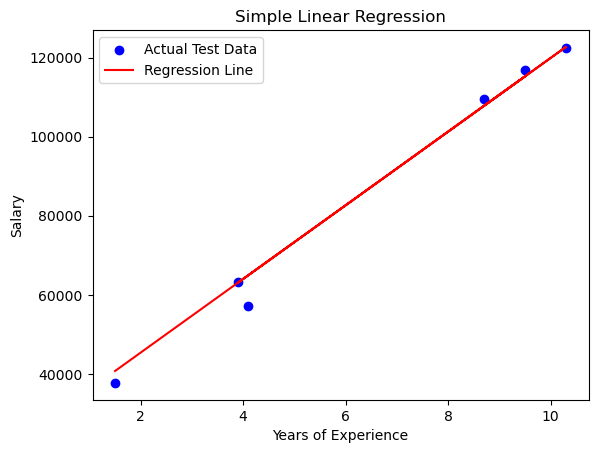

In [15]:
plt.scatter(X_test, y_test, color='blue', label='Actual Test Data')
plt.plot(X_test, model.predict(X_test), color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [16]:
# Comparing the results

comparision = pd.DataFrame()
comparision['Actual'] = y_test
comparision['predicted'] = y_pred
comparision

,Actual,predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


In [17]:
# Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error = ", mse)
print("R-squared = ", r2)

Mean Squared Error =  12823412.298126562
R-squared =  0.988169515729126


Therefore, 98.81% of the variability in the "Salary" variable is explained by the linear relationship with the "YearsExperience" variable according to the simple linear regression model you fitted. 

This is a very high R2-score, indicating that the model is capturing a substantial amount of the variability in salaries based on years of experience. 

This suggests that the linear regression line fits the data points quite well, and the relationship between "Years of Experience" and "Salary" is strongly correlated.

In [18]:
# Predicting by giving new data

# Predicting for 100 Years of Experience
new_exp = 100
predicted_salary = model.predict([[new_exp]])

print("Predicted Salary for New_Experience of {} is: {}" .format(new_exp, predicted_salary[0]))

# Predicting for 200 Years of Experience
new_exp = 200
predicted_salary = model.predict([[new_exp]])

print("Predicted Salary for New_Experience of {} is: {}" .format(new_exp, predicted_salary[0]))

# Predicting for 300 Years of Experience
new_exp = 300
predicted_salary = model.predict([[new_exp]])

print("Predicted Salary for New_Experience of {} is: {}" .format(new_exp, predicted_salary[0]))


Predicted Salary for New_Experience of 100 is: 958037.6118235469
Predicted Salary for New_Experience of 200 is: 1889295.1244964655
Predicted Salary for New_Experience of 300 is: 2820552.6371693844


In [19]:
new_exp = 10
for i in range(10):
    predicted_salary = model.predict([[new_exp]])
    print("Predicted Salary for New_Experience of {} is: {:.2f}" .format(new_exp, predicted_salary[0]))
    new_exp += 10


Predicted Salary for New_Experience of 10 is: 119905.85
Predicted Salary for New_Experience of 20 is: 213031.60
Predicted Salary for New_Experience of 30 is: 306157.35
Predicted Salary for New_Experience of 40 is: 399283.10
Predicted Salary for New_Experience of 50 is: 492408.86
Predicted Salary for New_Experience of 60 is: 585534.61
Predicted Salary for New_Experience of 70 is: 678660.36
Predicted Salary for New_Experience of 80 is: 771786.11
Predicted Salary for New_Experience of 90 is: 864911.86
Predicted Salary for New_Experience of 100 is: 958037.61
